# Homework 3

# Part I

### 1. 

 - Using the file "https://www.dropbox.com/s/4p74ya84niak743/Homework2.xlsx?dl=1", form equal-weight portfolios using the first 5, first 10, first 25, and all 50 stocks. 

- be careful to import this correctly
- pay attention in the units and make sure to interpret this correctly

- Calculate the sample mean and standard deviation of returns for each of the four equal-weight portfolios. 
- Plot estimated standard deviations as a function of the number of stocks in the equal-weight portfolio. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [2]:
df = pd.read_excel("https://www.dropbox.com/s/4p74ya84niak743/Homework2.xlsx?dl=1", index_col = 0)
df.index = pd.to_datetime(df.index, format = "%Y%m", errors = "ignore").to_period("M")
df.head()

,CTL,T,CSCO,FCX,XL,IVZ,AMT,WHR,IR,WFT,...,SWK,DVN,TMO,PEP,LNC,EMR,MLM,CCI,NU,Market
date,,,,,,,,,,,,,,,,,,,,,
2000-01,-18.4697,-11.5513,2.2170,-17.4556,-12.5301,-4.0929,17.3824,-10.4707,-14.5289,-5.9468,...,-16.5975,6.8441,15.4167,-3.1915,-6.9312,-4.0305,2.4390,-1.5564,-0.3040,-3.9612
2000-02,-12.9450,-11.2245,20.7192,-21.1470,-9.8898,5.3057,37.2822,-6.1760,-18.2311,19.8003,...,-8.4577,6.0498,-9.7473,-5.8608,-25.2115,-16.6039,-15.1667,1.9763,-7.7439,3.1777
2000-03,10.5502,10.6732,16.9740,-12.2727,36.9397,24.4250,0.2538,7.9402,15.4976,30.0000,...,15.6304,30.5034,30.4000,8.9805,21.2670,16.5981,33.8028,17.4419,14.2857,5.3500
2000-04,-34.0067,4.6083,-10.3274,-20.2073,-13.9955,0.9670,-5.6962,11.0874,6.0734,2.7153,...,11.8483,-0.9009,-4.9080,5.1971,4.7836,3.2941,11.5789,1.3201,0.0000,-5.9530
2000-05,10.3980,-0.2853,-17.8724,-4.5455,25.8793,-8.7719,-20.2685,-12.4338,-2.5672,6.0000,...,-8.8983,24.2857,-4.1935,11.4140,11.3106,8.1686,-7.4198,-31.7590,3.3721,-3.8871


,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
date,,,,,,,,,,,,,,,,,,,,,
2000-01,-18.4697,-15.01050,-9.268000,-11.314900,-11.55794,-10.313767,-6.357171,-6.871363,-7.722200,-7.54466,...,-4.214020,-4.508864,-4.244842,-3.797989,-3.784511,-3.852917,-3.856696,-3.725535,-3.681267,-3.613722
2000-02,-12.9450,-12.08475,-1.150100,-6.149325,-6.89742,-4.863567,1.157257,0.240600,-1.811811,0.34940,...,-2.993239,-3.123345,-2.910016,-3.065409,-3.127529,-3.607615,-3.884132,-4.119185,-3.994788,-4.069770
2000-03,10.5502,10.61170,12.732467,6.481175,12.57288,14.548233,12.506171,11.935425,12.331222,14.09810,...,12.553683,12.626938,13.042670,13.437155,13.338118,13.510485,13.576179,13.997567,14.067859,14.072216
2000-04,-34.0067,-14.69920,-13.241933,-14.983275,-14.78572,-12.160267,-11.236829,-8.446300,-6.833000,-5.87817,...,0.589590,0.857655,0.816758,0.686650,0.786882,0.873767,0.925264,1.147215,1.150743,1.127728
2000-05,10.3980,5.05635,-2.586567,-3.076300,2.71482,0.800367,-2.209471,-3.487513,-3.385256,-2.44673,...,1.189717,0.949526,1.492228,1.363007,1.586362,1.797759,1.933309,1.738452,1.054831,1.101176


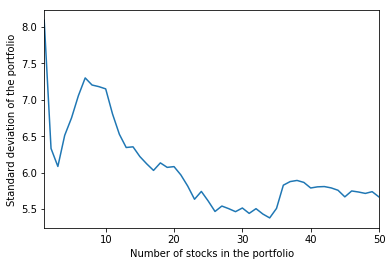

In [3]:
# Define a function to construct portfolios with n stocks.
def portfolio(n):
    P_n = df.values[:, 0:n]
    P_return = []
    for i in range(len(P_n)):
        daily_return = P_n[i].sum()/n
        P_return.append(daily_return)
    return(np.array(P_return))

# Construct a dataframe that displays monthly returns of portfolios with 1 stock, 2 stocks to 50 stocks.
list1 = []
for n in range(1, 51):
    list1.append(portfolio(n))
EW_Port = pd.DataFrame(data = np.array(list1).T, columns = range(1, 51), index = df.index)

# Plot the standard deviations of the portfolios with 1 stock, 2 stocks to 50 stocks.
EW_Port.std().plot()
plt.xlabel("Number of stocks in the portfolio")
plt.ylabel("Standard deviation of the portfolio")

EW_Port.head()

,Mean,Std
5,0.718722,6.752499
10,1.035793,7.150906
25,1.123499,5.612073
50,1.160541,5.667025


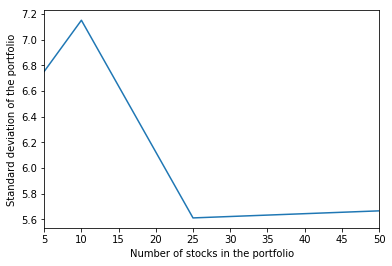

In [4]:
# Plot the standard deviations of the portfolios with 5 stocks, 10 stocks, 25 stocks and 50 stocks.
EW_Port.iloc[:,[4,9,24,49]].std().plot()
plt.xlabel("Number of stocks in the portfolio")
plt.ylabel("Standard deviation of the portfolio")

# Construct a dataframe that displays the mean and standard deviation of the portfolios 
# with 5 stocks, 10 stocks, 25 stocks and 50 stocks.
EW_Port_stats = pd.DataFrame({"Mean": EW_Port.iloc[:,[4,9,24,49]].mean(),
                              "Std": EW_Port.iloc[:,[4,9,24,49]].std()}, index = [5,10,25,50])
EW_Port_stats

### 2.

- Eye-balling the graph, does it look like adding more and more stocks will diversify away all of the standard deviation? Why or why not?
- Comment on the shape of the function. Point out a formula we studied in Notebook 4 that explains this shape. Discuss. 


No, it doesn't. From the graph, we can roughly see that with more stocks adding into the portfolio, the nonsystemmatic risks can be diversified away, but won't be 100% eliminate because there are still systemmatic risks contained in the portfolio.

From the graph, we can see that the std of second portfolio is a little bit higher that the 5-stock portoflio. This is because when the portfolio has less assets, the variance terms and covariance terms play an equal role, which means the individual assets' volatility can drive up the portofolio's volatility. With more assets adding to the portfolio, the covariance terms will play a more important role in the calculation, so the volatility of the portfolio will decrease. The formula we can use is:

$$Var(R_p)= Var(\sum_{j=1}^N w_jR_j)=Cov(\sum_{j=1}^N w_jR_j,\sum_{i=1}^N w_iR_i)=\sum_{j=1}^N  w_j Cov(R_j,\sum_{i=1}^N w_iR_i)=\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(R_j, R_i)$$

### 3. 

- For all four equal-weight portfolios, decompose the estimated portfolio variance into its two components (the contributions of variances and covariances). 
    
    * Hint: First compute the total variance of each portfolio Total=Var(W'R), then compute the variance contribution, which is given by Varcomp=$\sum W_i^2 Var(R_i)$, then construct the covariance component as the difference: Covcomp=Total-Varcomp
    
    * Hint: you can sum only the variance terms by first making the variance-covariance matrix diagonal : np.diag(Sigma) returns a vector with the diagonal component of Sigma if Sigma is a matrix, and if X is a vector np.diag(X) creates a diagonal square matrix of the same dimension as X where the diagonal of the matrix is populated by the entries in X.
    
 - Plot the percentage of the portfolio’s variance due to the variances of individual security returns as a function of the number of stocks in the portfolio. 
 

 



### Answer here:

Text(0, 0.5, 'Percentage explained by variances of individual security')

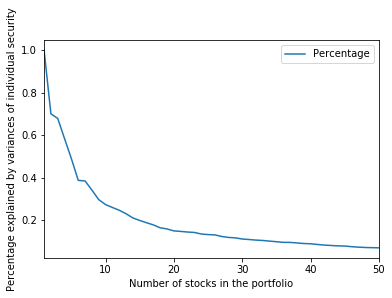

In [5]:
# Define a function that calculate the percentage of the portfolio’s (with n stocks) variance 
# due to the variances of individual security returns.
def PerVarcomp(n):
    Varcomp = np.array(df.iloc[:, 0:n].var()) @ np.ones((n,1))/n**2
    PortVar = EW_Port[n].var()
    Per = Varcomp / PortVar
    return(Per[0])

# Construct a dataframe that displays the percentages of variance composition of 
# the portfolios with 1 stock, 2 stocks to 50 stocks.
list2 = []
for n in range(1, 51):
    list2.append(PerVarcomp(n))
df_PerVarcomp = pd.DataFrame({"Percentage": np.array(list2)}, index = list(range(1, 51)))

# Plot the percentages of variance composition of the portfolios with 1 stock, 2 stocks to 50 stocks.
df_PerVarcomp.plot()
plt.xlabel("Number of stocks in the portfolio")
plt.ylabel("Percentage explained by variances of individual security")

Text(0, 0.5, 'Percentage explained by variances of individual security')

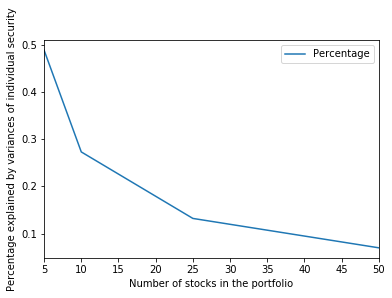

In [6]:
# Plot the percentages of variance composition of the portfolios with 5 stocks, 10 stocks, 25 stocks and 50 stocks.
df_PerVarcomp.iloc[[4,9,24,49],:].plot()
plt.xlabel("Number of stocks in the portfolio")
plt.ylabel("Percentage explained by variances of individual security")

### 4.

- Comment on the shape of the function. Point out a formula we studied in Notebook 4 that explains this shape. Discuss. 

The shape of the function shows that as the number of assets increases, the percentage of the portfolio’s variance due to the variances of individual security returns decreases. This is because the covarience terms increase exponentially, outweighing the importance of variance terms. The formula we can use is:

$$Var(R_p)= Var(\sum_{j=1}^N w_jR_j)=Cov(\sum_{j=1}^N w_jR_j,\sum_{i=1}^N w_iR_i)=\sum_{j=1}^N  w_j Cov(R_j,\sum_{i=1}^N w_iR_i)=\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(R_j, R_i)$$

### 5. 

- Compute the test statistics for whether the mean return of each of the four equal-weight portfolios you calculated in part 2 is different from zero. Speficically compute a t-test

$$t_i=\frac{average[R_i]}{standarddeviation[R_i]/\sqrt{SampleSize}}$$


- The t-test is normally distributed with mean zero and variance 1 under the null that the expected return is indeed zero

- Do you reject or fail to reject the null hypothesis that each of the mean returns on the portfolios is different from zero?
 
 HINT:
 * follow the steps in notebook 3 to import the nomal distribution, define a standard normal
 * use the method .cdf (cumulative density function) that we use in class to evaluate the probability that this t-stat was generated by a standard normal distribution, i.e. how likely that this t-stat was indeed generated by a standard normal 

 ### Answer here:

In [7]:
# Calculate the t-stats and p-values for the portfolios with 5 stocks, 10 stocks, 25 stocks and 50 stocks.
T = len(EW_Port)
standard_norm = norm(0,1)
EW_Port_stats["t-stat"] = EW_Port_stats["Mean"]/(EW_Port_stats["Std"]/(T**0.5))
EW_Port_stats["p-value"] = 2*(1-standard_norm.cdf(EW_Port_stats["t-stat"]))

# Test whether the p-values are smaller than 5% or not.
print("P-values are smaller than 5% or not:")
print(EW_Port_stats["p-value"] < 0.05)
EW_Port_stats

P-values are smaller than 5% or not:
5     False
10    False
25     True
50     True
Name: p-value, dtype: bool


,Mean,Std,t-stat,p-value
5,0.718722,6.752499,1.428014,0.153288
10,1.035793,7.150906,1.943337,0.051975
25,1.123499,5.612073,2.685873,0.007234
50,1.160541,5.667025,2.747526,0.006005


The p-values of the portfolios with 5 stocks and 10 stocks are bigger than 0.05, while p-values of the portfolio with 25 stocks and 50 stocks are smaller than 0.05. Therefore, at 5% significance level, for portfolios with 5 stocks and 10 stocks, we fail to reject the null hypothesis. At 5% significance level, for portfolios with 25 stocks and 50 stocks, we should reject the null hypothesis and conclude that each of the mean returns on the portfolios is different from zero.

# Part II


### 6. 

a)	For CSCO and the market, calculate volatility (return standard deviation) using two different methods. 

1. First method: for each date, calculate volatility using all the past data up to that date.  

2. Second method: use only one year of past data. 

For both CSCO and the market, plot the two volatility estimates on the same chart. 

Why does the estimate using only the most recent year of data move around more than the estimate using all data?  Give two reasons why this might be the case.

Hint: you can use a for loop starting when there is only one year of data (2001) and loop through the months unitl the end of the sample. For method 1 you compute the standard deviaiton using all obserrvation unitl the relvant month, while in mehtod 2 will use only the last 12 months worht of data

You can also use the method .rolling

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

In [8]:
# Calculate volatility using the first method.
list3 = []
for i in range(1, len(df)+1):
    list3.append(df[["CSCO","Market"]].iloc[0:i].std())
csco_mkt_std1 = pd.DataFrame(data = np.array(list3), index = df.index, columns = ["CSCO_V1", "Market_V1"])

# Calculate volatility using the second method.
csco_mkt_std2 = df[["CSCO","Market"]].rolling(12).std()
csco_mkt_std2.rename(columns = {"CSCO": "CSCO_V2", "Market": "Market_V2"}, inplace = True)

# Construct a dataframe that displays two volatility estimates of CSCO and the market.
csco_mkt_std = pd.merge(csco_mkt_std1, csco_mkt_std2, on = 'date', how = "outer")
csco_mkt_std.head()

,CSCO_V1,Market_V1,CSCO_V2,Market_V2
date,,,,
2000-01,NaN,NaN,NaN,NaN
2000-02,13.083031,5.047965,NaN,NaN
2000-03,9.782016,4.871366,NaN,NaN
2000-04,14.261682,5.457991,NaN,NaN
2000-05,16.740432,4.984901,NaN,NaN


Text(0, 0.5, 'Volatility')

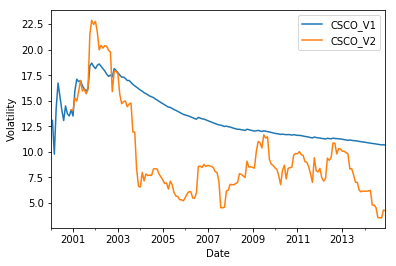

In [9]:
# Plot the two volatility estimates of CSCO.
csco_mkt_std[["CSCO_V1", "CSCO_V2"]].plot()
plt.xlabel("Date")
plt.ylabel("Volatility")

Text(0, 0.5, 'Volatility')

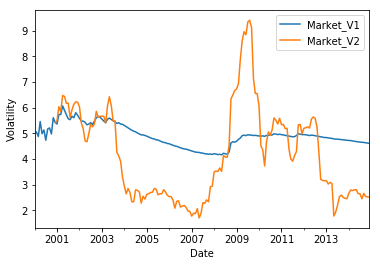

In [10]:
# Plot the two volatility estimates of the market.
csco_mkt_std[["Market_V1", "Market_V2"]].plot()
plt.xlabel("Date")
plt.ylabel("Volatility")

Two reasons:
1. Based on the first method, when we add more dates into calcluation, the marginal contribution of each date to the stock's total volatility will decrease.
2. The standad deviation of smaller dataset is more influenced by the extreme value. Because the second method is calculated based on 12 month rolling basis, it is more likely to be influenced by extreme value of the dates. Therefore, the graph of the second method moves around more.